In [16]:
import pandas as pd 
import numpy as np
from nltk import ngrams
from gensim import corpora, models
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("music_clean.csv")

In [18]:
X=df.drop(['genre'],axis=1)
Y=df['genre']

In [19]:
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

#Feature Scalling --> for standardization 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Hyper tuning 
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1)

In [20]:
# fitting the model
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
best_model = LogisticRegression(**best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}


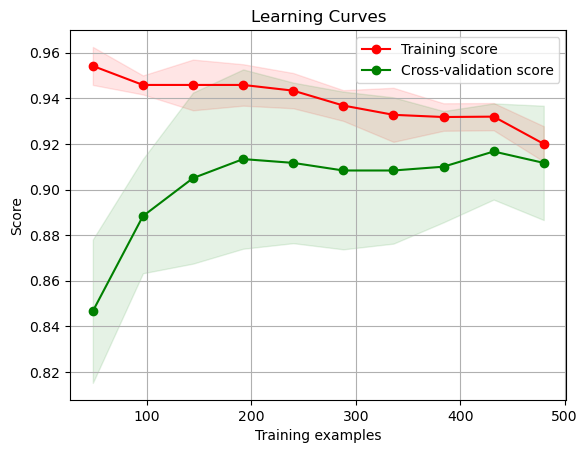

In [55]:
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', save_path='learning_curve.png'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=-1, 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Save the figure
    plt.savefig(save_path)
    plt.show()

plot_learning_curve(best_model, X_train, Y_train, cv=5, save_path='LR_LR.png')

In [22]:
# Train the Logistic Regression model 
best_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [23]:
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.91


In [24]:
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.91


In [25]:
# report
best_report = classification_report(Y_test, y_test_pred)
print("Classification Report with Best Parameters:")
print(best_report)

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.96      0.84      0.89        91
           1       0.88      0.97      0.92       109

    accuracy                           0.91       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.92      0.91      0.91       200



In [32]:
# SVM with Grid Search
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, Y_train)

best_params_svm = grid_search_svm.best_params_
best_model_svm = SVC(**best_params_svm)



Fitting 5 folds for each of 96 candidates, totalling 480 fits


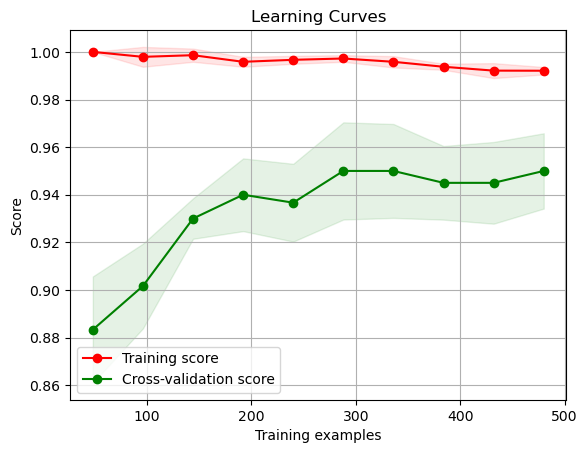

In [33]:
plot_learning_curve(best_model_svm, X_train, Y_train, cv=5, save_path='LR_SVM.png')

In [34]:
best_model_svm.fit(X_train, Y_train)
y_pred_best_svm = best_model_svm.predict(X_test)

In [35]:
y_val_pred = best_model_svm.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.935


In [36]:
y_test_pred = best_model_svm.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.945


In [37]:
best_report_svm = classification_report(Y_test, y_pred_best_svm)
print("Classification Report with Best Parameters for SVM:")
print(best_report_svm)

Classification Report with Best Parameters for SVM:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        91
           1       0.92      0.99      0.95       109

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [39]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', verbose=1)
grid_search_dt.fit(X_train, Y_train)
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters: {best_params_dt}")

best_model_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


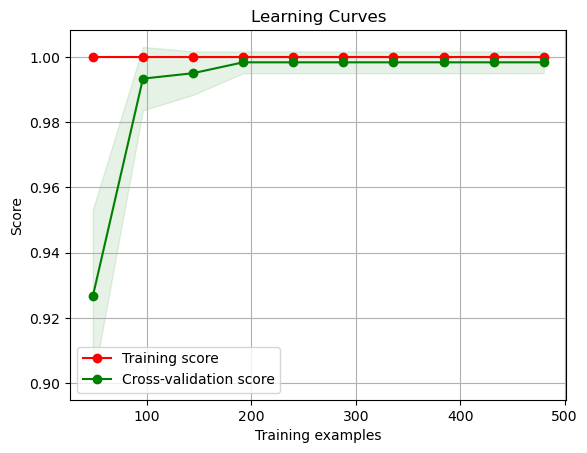

In [40]:
plot_learning_curve(best_model_dt, X_train, Y_train, cv=5, save_path='LR_DT.png')

In [52]:
best_model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_val_pred_dt = best_model_dt.predict(X_val)
val_accuracy_dt = accuracy_score(Y_val, y_val_pred_dt)
print(f"Validation Accuracy: {val_accuracy_dt}")

Validation Accuracy: 0.985


In [43]:
y_test_pred_dt = best_model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(Y_test, y_test_pred_dt)
print(f"Test Accuracy: {test_accuracy_dt}")

Test Accuracy: 0.995


In [44]:
best_report_dt = classification_report(Y_test, y_test_pred_dt)
print("Classification Report with Best Parameters:")
print(best_report_dt)

Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.99      1.00      1.00       109

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [45]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search_rf.fit(X_train, Y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(**best_params_rf)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


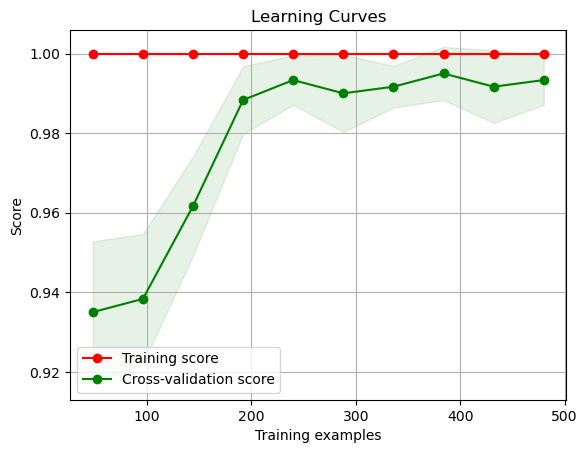

<Figure size 640x480 with 0 Axes>

In [53]:
plot_learning_curve(best_model_rf, X_train, Y_train, cv=5, save_path='LR_RF.png')

In [47]:
best_model_rf.fit(X_train, Y_train)
y_pred_best_rf = best_model_rf.predict(X_test)

In [48]:
y_val_pred = best_model_rf.predict(X_val)
val_accuracy = accuracy_score(Y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.99


In [49]:
y_test_pred = best_model_rf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 1.0


In [50]:
best_report_rf = classification_report(Y_test, y_pred_best_rf)
print("Classification Report with Best Parameters for rf:")
print(best_report_rf)

Classification Report with Best Parameters for rf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

